# 🧮 Problem 2: Estimating π Using Monte Carlo Methods

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">🎲 Monte Carlo Methods: Estimating π Through Randomness</h2>
</div>

---

## 🎯 Motivation

Monte Carlo simulations allow us to estimate complex values using randomness. A famous example is estimating **π**, using either:
- **Geometric probability** (Circle-in-a-Square Method)
- **Buffon’s Needle** (a probabilistic geometry problem)

These simulations not only visualize randomness in action but reveal convergence and computational tradeoffs in statistical estimation.

---

## 🔵 Part 1: Circle-Based Monte Carlo Method

### 📐 Theoretical Foundation

A unit circle (radius = 1) inscribed in a square of side length 2 has:

- Circle area:  
  $$ A_{\text{circle}} = πr^2 = π $$

- Square area:  
  $$ A_{\text{square}} = (2r)^2 = 4 $$

By randomly generating points in the square and checking if they fall inside the circle:

- The ratio of points inside the circle approaches  
  $$ π/4 $$

- Therefore:  
  $$ π \approx 4 \cdot \frac{\text{Points in circle}}{\text{Total points}} $$

---

## 🧪 Part 2: Buffon’s Needle Simulation

### 📐 Theoretical Foundation

Buffon's Needle experiment estimates π by dropping a needle of length $l$ on a plane with parallel lines spaced $d$ units apart ($l \leq d$).

The probability that the needle crosses a line is:  
$$
P = \frac{2l}{dπ}
$$

Rearranging gives:  
$$
π \approx \frac{2l \cdot N}{d \cdot C}
$$

Where:
- $N$ = total needle drops  
- $C$ = number of times the needle crosses a line

---

## 📈 Deliverables

- Circle Method: Plots of random points with circle overlay
- Buffon’s Needle: Plots of needle positions and crossings
- Convergence plots showing how π estimates improve with more samples
- A comparison of both methods in terms of **accuracy** and **efficiency**

---

## 🌟 Real-World Significance

Monte Carlo methods are used in:
- Physics simulations
- Risk assessment in finance
- AI (random search, Monte Carlo Tree Search)
- Quality control and integration

---

## 🧠 Final Insight

> Monte Carlo methods beautifully illustrate how randomness, probability, and geometry combine to approximate one of the most fundamental constants in mathematics.


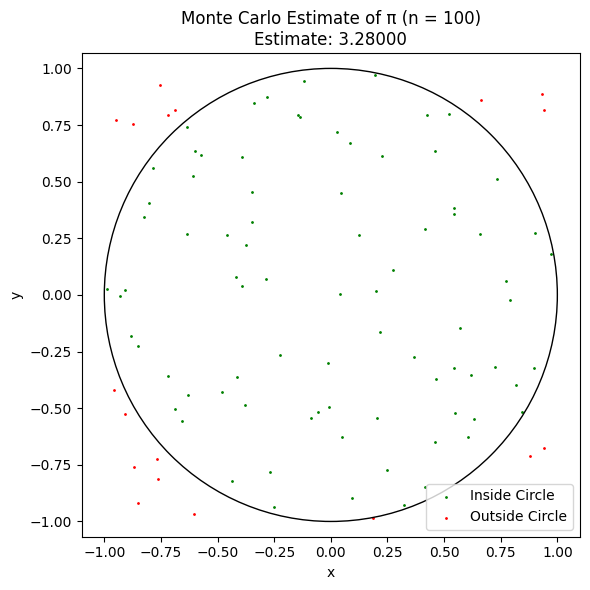

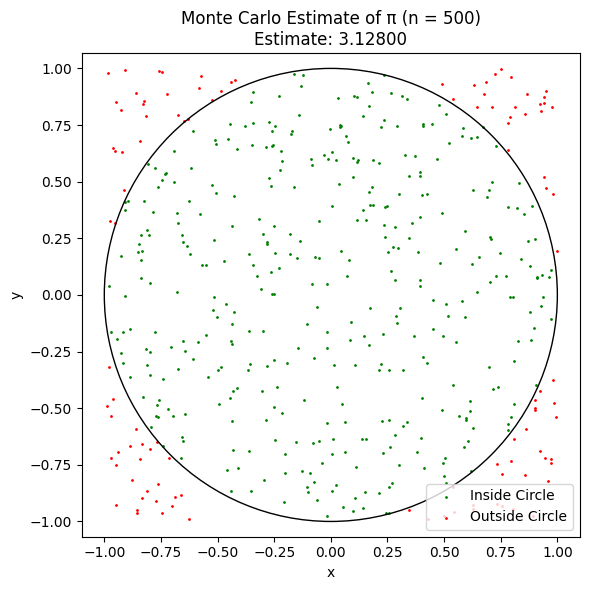

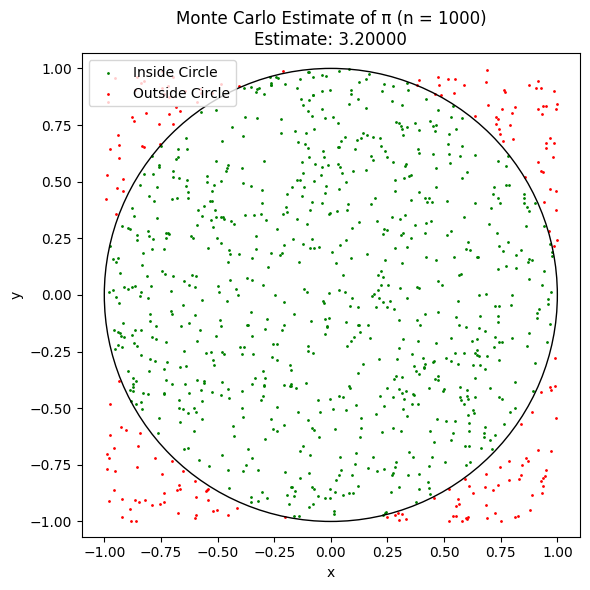

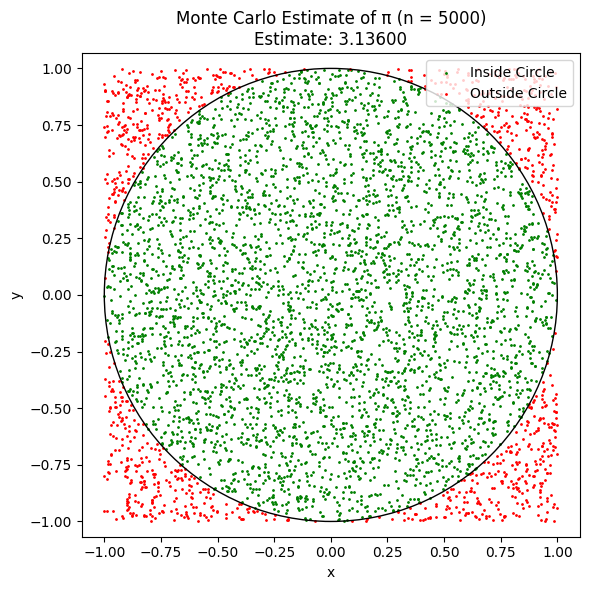

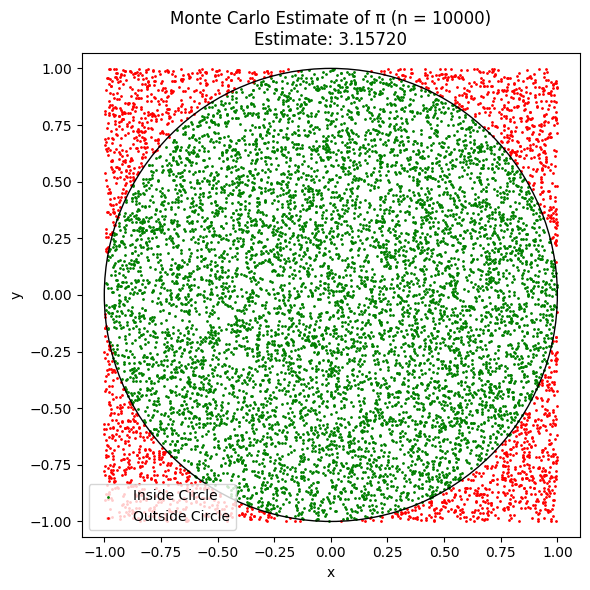

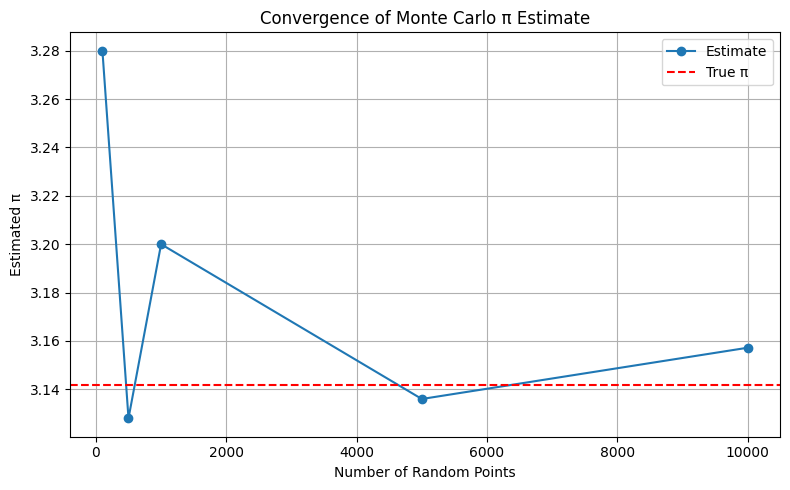

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
np.random.seed(42)
n_points = [100, 500, 1000, 5000, 10000]

estimates = []

for total in n_points:
    x = np.random.uniform(-1, 1, total)
    y = np.random.uniform(-1, 1, total)
    inside = x**2 + y**2 <= 1
    pi_estimate = 4 * np.sum(inside) / total
    estimates.append(pi_estimate)

    # Plot the simulation
    plt.figure(figsize=(6, 6))
    plt.scatter(x[inside], y[inside], color='green', s=1, label='Inside Circle')
    plt.scatter(x[~inside], y[~inside], color='red', s=1, label='Outside Circle')
    circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=1)
    plt.gca().add_patch(circle)
    plt.title(f"Monte Carlo Estimate of π (n = {total})\nEstimate: {pi_estimate:.5f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Convergence plot
plt.figure(figsize=(8, 5))
plt.plot(n_points, estimates, marker='o', label='Estimate')
plt.axhline(np.pi, color='red', linestyle='--', label='True π')
plt.title("Convergence of Monte Carlo π Estimate")
plt.xlabel("Number of Random Points")
plt.ylabel("Estimated π")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


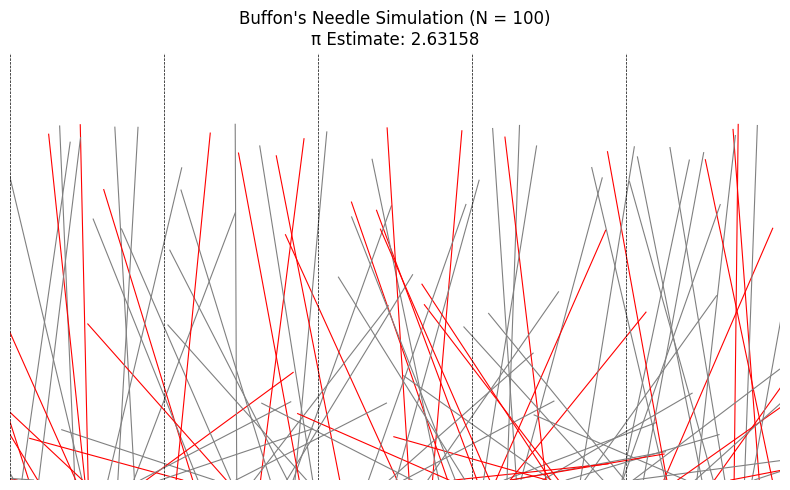

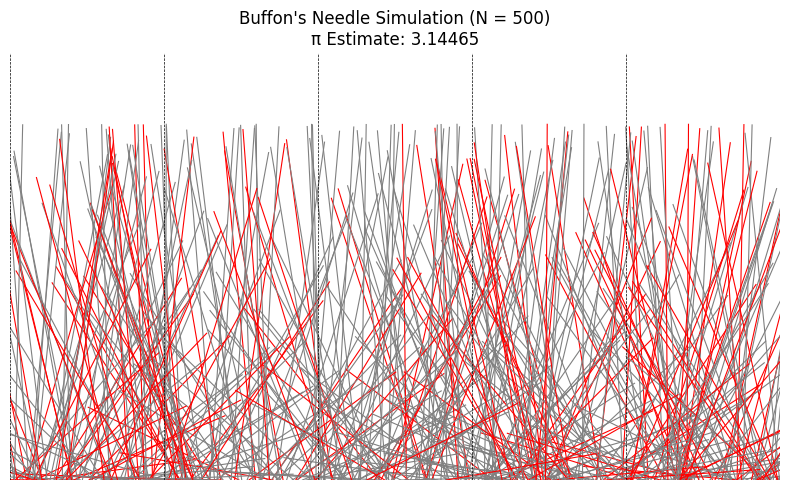

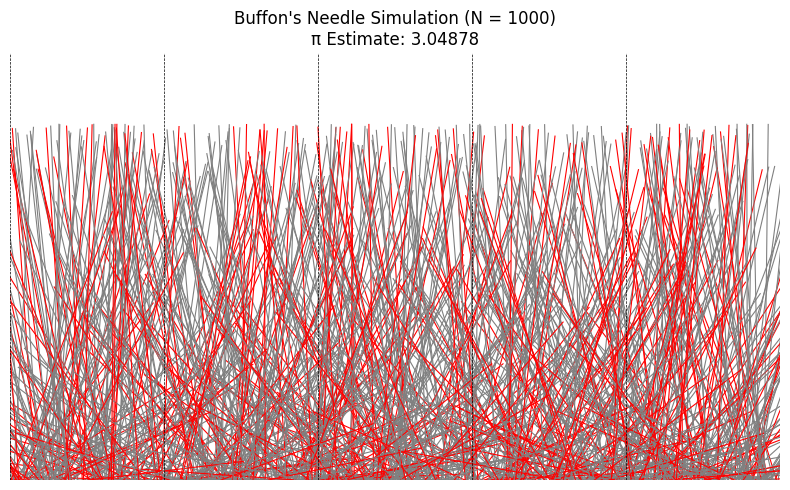

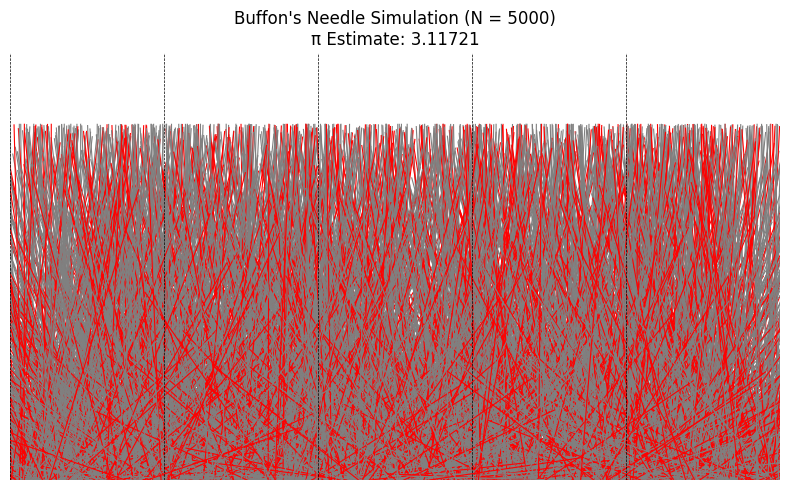

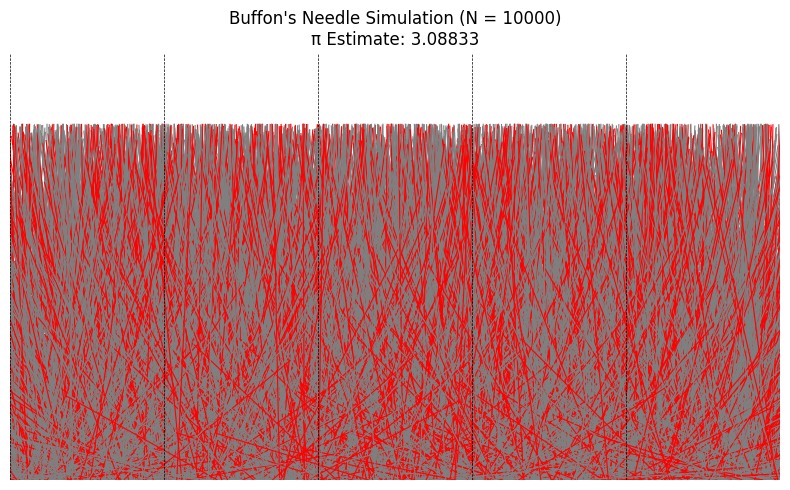

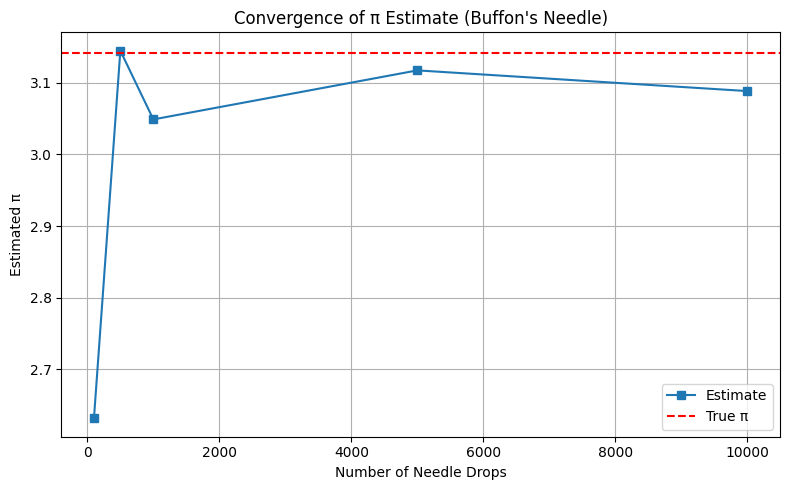

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Buffon's Needle simulation
def simulate_buffon(N, L=1.0, D=2.0):
    np.random.seed(42)
    drops = np.random.uniform(0, D/2, N)       # Distance from center to nearest line
    angles = np.random.uniform(0, np.pi/2, N)  # Acute angles
    crosses = drops <= (L/2) * np.sin(angles)
    pi_est = (2 * L * N) / (D * np.sum(crosses))
    return crosses, pi_est

N_list = [100, 500, 1000, 5000, 10000]
estimates = []

for N in N_list:
    crosses, pi_est = simulate_buffon(N)
    estimates.append(pi_est)

    # Visualize simulation
    x_start = np.random.uniform(0, 5, N)
    theta = np.random.uniform(0, np.pi, N)
    x_end = x_start + np.cos(theta)
    y_start = np.zeros(N)
    y_end = y_start + np.sin(theta)

    plt.figure(figsize=(8, 5))
    for i in range(N):
        color = 'red' if crosses[i] else 'gray'
        plt.plot([x_start[i], x_end[i]], [y_start[i], y_end[i]], color=color, linewidth=0.8)
    for i in range(6):
        plt.axvline(i, color='black', linestyle='--', linewidth=0.5)
    plt.title(f"Buffon's Needle Simulation (N = {N})\nπ Estimate: {pi_est:.5f}")
    plt.xlim(0, 5)
    plt.ylim(0, 1.2)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Convergence plot
plt.figure(figsize=(8, 5))
plt.plot(N_list, estimates, marker='s', label='Estimate')
plt.axhline(np.pi, color='red', linestyle='--', label='True π')
plt.title("Convergence of π Estimate (Buffon's Needle)")
plt.xlabel("Number of Needle Drops")
plt.ylabel("Estimated π")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
